In [40]:
# Mounting drive to colab notebook
from  google.colab import drive
drive.mount('/content/drive/')
#change to current working directory
%cd 'drive/My Drive/nlp_project'
!ls
#Run below line of code if you want to clone the bert model
#!git clone https://github.com/google-research/bert.git
#if you clone this repo make sure you change the get_labels function in  ColaProcessor class
#Modify the return value of this function  according to the classes you want to train ------------- Line location 356 in run_classifier.py
#In our case it was a three class classification problem so the function returns ["0", "1", "2"]
#the cloned folder was designed for classification task with two classes so the function returns ["0","1"]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/nlp_project'
/content/drive/My Drive/nlp_project
 bert					       'Clinical Segmentation ML.ipynb'
 bert_output				        data
 cased_L-12_H-768_A-12			        data_cleaned.tsv
'Clinical Note Segmentation using BERT.ipynb'   uncased_L-12_H-768_A-12


In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import csv
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
csv.field_size_limit(1000000)
le = LabelEncoder()
 
df = pd.read_csv('data_cleaned.tsv', sep='\t',error_bad_lines=False)
df = df[["RECORD_ID","SECTION_TEXT","HEADER_TYPE"]]
df.head()


b'Skipping line 24: expected 4 fields, saw 10\nSkipping line 32: expected 4 fields, saw 80\nSkipping line 189: expected 4 fields, saw 6\nSkipping line 194: expected 4 fields, saw 6\nSkipping line 195: expected 4 fields, saw 6\nSkipping line 212: expected 4 fields, saw 5\nSkipping line 239: expected 4 fields, saw 6\nSkipping line 259: expected 4 fields, saw 44\nSkipping line 274: expected 4 fields, saw 6\nSkipping line 297: expected 4 fields, saw 22\nSkipping line 332: expected 4 fields, saw 6\nSkipping line 418: expected 4 fields, saw 22\nSkipping line 419: expected 4 fields, saw 60\nSkipping line 422: expected 4 fields, saw 36\nSkipping line 461: expected 4 fields, saw 10\nSkipping line 469: expected 4 fields, saw 758\nSkipping line 583: expected 4 fields, saw 36\nSkipping line 751: expected 4 fields, saw 6\nSkipping line 767: expected 4 fields, saw 6\nSkipping line 829: expected 4 fields, saw 10\nSkipping line 835: expected 4 fields, saw 22\nSkipping line 840: expected 4 fields, saw 

,RECORD_ID,SECTION_TEXT,HEADER_TYPE
0,299-05,\n;nothing new to report\n;nothing new to report,social_history
1,181-03,"Briefly, Ms. Levin is a 54-year-old female ...",history_present_illness
2,342-03,\nMrs Barr has been doing well.\nHas a 8 weeks...,history_present_illness
3,342-03,\nPlavix (CLOPIDOGREL) 75 MG (75MG TABLET take...,medications
4,343-02,HISTORY OF PRESENTING COMPLAINT Mr. Killian ...,history_present_illness


In [42]:
df_bert = pd.DataFrame({'user_id':df['RECORD_ID'],
            'label':le.fit_transform(df['HEADER_TYPE']),
            'alpha':['a']*df.shape[0],
            'text':df['SECTION_TEXT'].replace(r'\n',' ',regex=True)})
df_bert.head()

,user_id,label,alpha,text
0,299-05,2,a,\n;nothing new to report\n;nothing new to report
1,181-03,0,a,"Briefly, Ms. Levin is a 54-year-old female ..."
2,342-03,0,a,\nMrs Barr has been doing well.\nHas a 8 weeks...
3,342-03,1,a,\nPlavix (CLOPIDOGREL) 75 MG (75MG TABLET take...
4,343-02,0,a,HISTORY OF PRESENTING COMPLAINT Mr. Killian ...


In [43]:
df_bert = df_bert.dropna()
df_bert_train, df_bert_test = train_test_split(df_bert, test_size=0.2)
df_bert_train, df_bert_dev = train_test_split(df_bert_train,test_size = 0.2)
print(df_bert_train.shape,df_bert_dev.shape,df_bert_test.shape)
print("Train:\n ",df_bert_train["label"].value_counts())
print("Dev:\n ",df_bert_dev["label"].value_counts())
print("Test:\n ",df_bert_test["label"].value_counts())

(1230, 4) (308, 4) (385, 4)
Train:
  0    506
1    436
2    288
Name: label, dtype: int64
Dev:
  0    131
1     91
2     86
Name: label, dtype: int64
Test:
  0    152
1    135
2     98
Name: label, dtype: int64


In [44]:
df_bert_gt = df_bert_test
df_bert_test = df_bert_test[['user_id','text']]
df_bert_gt.head()

,user_id,label,alpha,text
577,187-02,2,a,He is a former stage manager.\nNeurological...
395,310-04,0,a,\nMr. Ware is a 67-year-old man with a histor...
522,364-02,1,a,\nAspirin 325 QD\nVerapamil 60mg TID\nGlybyri...
1785,205-01,1,a,Her current medications are aspirin 81 mg. ...
568,396-03,0,a,\nLast CPE 2 yrs ago.\nHad severe injury to ri...


In [45]:
df_bert_test.head()

,user_id,text
577,187-02,He is a former stage manager.\nNeurological...
395,310-04,\nMr. Ware is a 67-year-old man with a histor...
522,364-02,\nAspirin 325 QD\nVerapamil 60mg TID\nGlybyri...
1785,205-01,Her current medications are aspirin 81 mg. ...
568,396-03,\nLast CPE 2 yrs ago.\nHad severe injury to ri...


In [0]:
df_bert_train.to_csv('data/train.tsv', sep='\t', index=False, header=False)
df_bert_dev.to_csv('data/dev.tsv', sep='\t', index=False, header=False)
df_bert_test.to_csv('data/test.tsv', sep='\t', index=False, header=True)
df_bert_test.to_csv('data/test_gt.tsv', sep='\t', index=False, header=True)


In [47]:
# As finetuned models were already present, this command completes execution with in no time.
!python bert/run_classifier.py --task_name=cola --do_train=true --do_eval=true --do_predict=true --data_dir=./data/ --vocab_file=./cased_L-12_H-768_A-12/vocab.txt --bert_config_file=./cased_L-12_H-768_A-12/bert_config.json --init_checkpoint=./cased_L-12_H-768_A-12/bert_model.ckpt --max_seq_length=400 --train_batch_size=8 --learning_rate=2e-5 --num_train_epochs=3.0 --output_dir=./bert_output/ --do_lower_case=False


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': './bert_output/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f26e75789e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief':

Confusion Matrix : 
 [[151   0   1]
 [  0 134   1]
 [  1   1  96]]
Accuracy =  0.9896103896103896
f1_score (micro) = 0.9896103896103896
f1_score (weighted) = 0.9896103896103896
f1_score (macro) = 0.9885351606529552


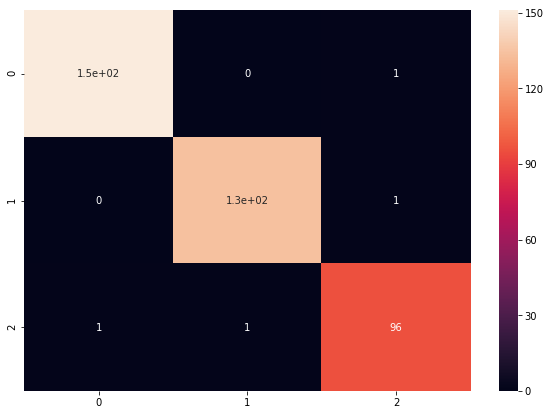

In [48]:
df_results = pd.read_csv("bert_output/test_results.tsv",sep="\t",header=None)
y_test = df_bert_gt['label'].reset_index(drop=True) 
y_pred = df_results.idxmax(axis = 1).reset_index(drop=True) 
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))

print("Accuracy = ", np.mean(y_test == y_pred))
print("f1_score (micro) = " + str(f1_score(y_test, y_pred, average = 'micro')))
print("f1_score (weighted) = " + str(f1_score(y_test, y_pred, average = 'weighted')))
print("f1_score (macro) = " + str(f1_score(y_test, y_pred, average = 'macro')))

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
#plt.matshow(df_cm)

References:

https://appliedmachinelearning.blog/2019/03/04/state-of-the-art-text-classification-using-bert-model-predict-the-happiness-hackerearth-challenge/